# 주가 예측
### 프로그램 설치
- conda install pandas-datareader
- conda install -c conda-forge pystan
- conda install plotly
- conda install -c conda-forge fbprophet
- pip install yfinance

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from datetime import datetime
from fbprophet import Prophet
import pandas_datareader as pdr
import yfinance as yf

## 주가 데이터 가져오기
- Nasdaq 'QQQ'

In [ ]:
""" start = datetime(2021, 1, 1)
end = datetime(2021, 6, 30)
# qqq = pdr.get_data_yahoo('QQQ', start=start, end=end)
qqq = pdr.DataReader('QQQ', data_source='yahoo', start=start, end=end)
qqq.head() """

In [4]:
start = datetime(2021, 1, 1)
end = datetime(2021, 7, 2)
qqq = yf.download('QQQ', start=start, end=end)
qqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300
2021-06-29,353.529999,355.019989,352.670013,354.989990,354.989990,29426000
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000
2021-07-01,354.070007,355.089996,352.679993,354.570007,354.570007,29262900


- 삼성전자(005930)

In [5]:
sse = yf.download('005930.KS', start=start)
sse.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,81700.0,82000.0,81600.0,81900.0,81900.0,11578529
2021-06-29,81900.0,82100.0,80800.0,81000.0,81000.0,15744317
2021-06-30,81100.0,81400.0,80700.0,80700.0,80700.0,13288643
2021-07-01,80500.0,80600.0,80000.0,80100.0,80100.0,13382882
2021-07-02,80000.0,80400.0,79900.0,80200.0,80200.0,4080336


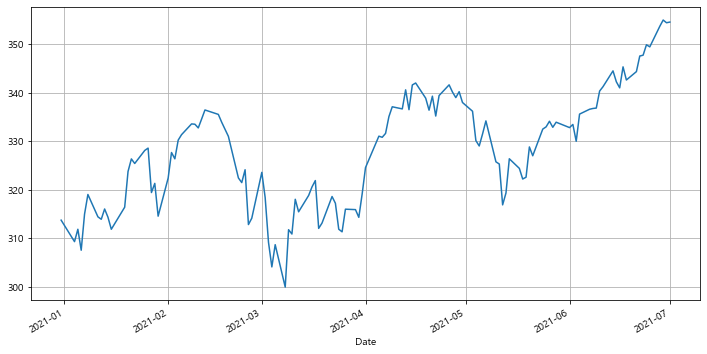

In [6]:
qqq.Close.plot(figsize=(12,6), grid=True)
plt.show()

## Prophet 사용

In [7]:
start = datetime(2016,1,1)
end = datetime(2021,7,1)
qqq = yf.download('QQQ', start=start, end=end)
qqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-24,349.730011,351.459991,349.170013,349.890015,349.890015,32581600
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300
2021-06-29,353.529999,355.019989,352.670013,354.989990,354.989990,29426000
2021-06-30,354.829987,355.230011,353.829987,354.429993,354.429993,32724000


In [8]:
df = pd.DataFrame({
    'ds': qqq.index, 'y': qqq.Close
})
df.head()

,ds,y
Date,,
2015-12-31,2015-12-31,111.860001
2016-01-04,2016-01-04,109.500000
2016-01-05,2016-01-05,109.309998
2016-01-06,2016-01-06,108.260002
2016-01-07,2016-01-07,104.870003


In [9]:
df.reset_index(inplace=True)
del df['Date']
df.tail()

,ds,y
1379,2021-06-24,349.890015
1380,2021-06-25,349.459991
1381,2021-06-28,353.709991
1382,2021-06-29,354.989990
1383,2021-06-30,354.429993


In [10]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [14]:
future = model.make_future_dataframe(184)
future.tail()

,ds
1563,2021-12-27
1564,2021-12-28
1565,2021-12-29
1566,2021-12-30
1567,2021-12-31


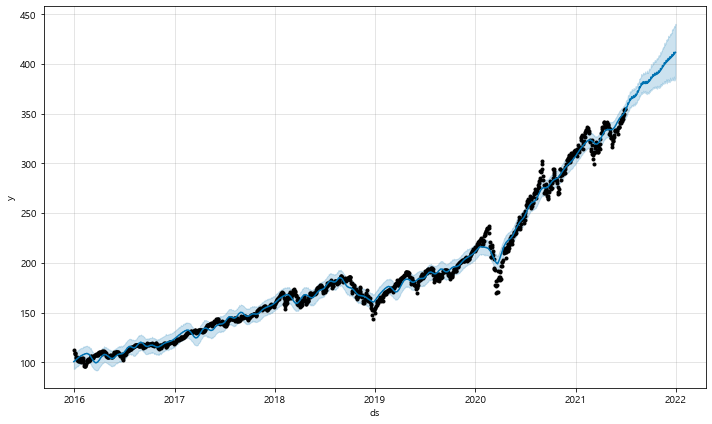

In [15]:
forecast = model.predict(future)
model.plot(forecast);

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-12-31,108.240952,93.176520,108.062937,108.240952,108.240952,-7.572931,-7.572931,-7.572931,-10.017575,...,-0.435877,-0.435877,-0.435877,2.880521,2.880521,2.880521,0.0,0.0,0.0,100.668021
1,2016-01-04,108.692400,93.671204,109.280979,108.692400,108.692400,-7.337411,-7.337411,-7.337411,-10.017575,...,-0.645487,-0.645487,-0.645487,3.325650,3.325650,3.325650,0.0,0.0,0.0,101.354989
2,2016-01-05,108.805262,94.788517,109.535472,108.805262,108.805262,-6.954808,-6.954808,-6.954808,-10.017575,...,-0.389395,-0.389395,-0.389395,3.452161,3.452161,3.452161,0.0,0.0,0.0,101.850454
3,2016-01-06,108.918124,94.517726,109.227897,108.918124,108.918124,-6.861311,-6.861311,-6.861311,-10.017575,...,-0.427075,-0.427075,-0.427075,3.583339,3.583339,3.583339,0.0,0.0,0.0,102.056812
4,2016-01-07,109.030985,94.533552,110.352254,109.030985,109.030985,-6.735156,-6.735156,-6.735156,-10.017575,...,-0.435877,-0.435877,-0.435877,3.718296,3.718296,3.718296,0.0,0.0,0.0,102.295830


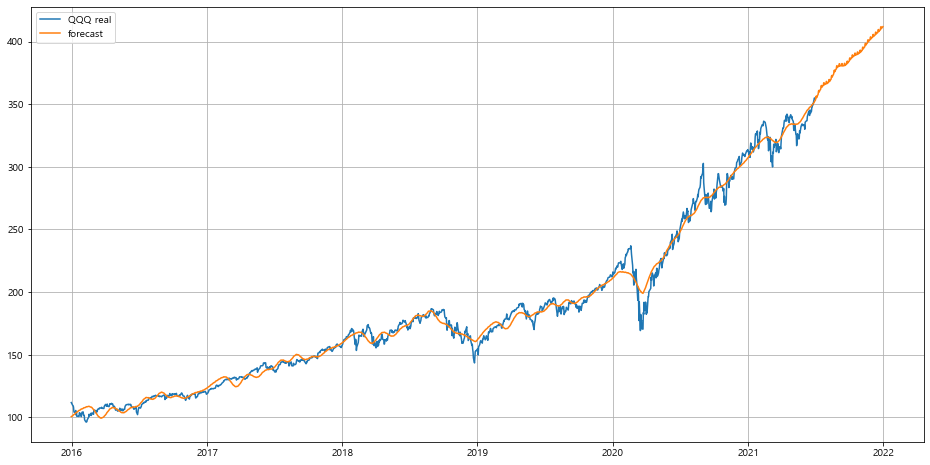

In [18]:
plt.figure(figsize=(16,8))
plt.plot(qqq.index, qqq.Close, label='QQQ real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()